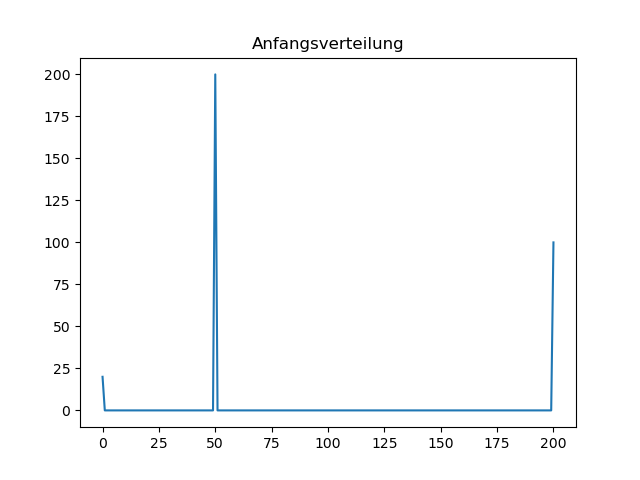

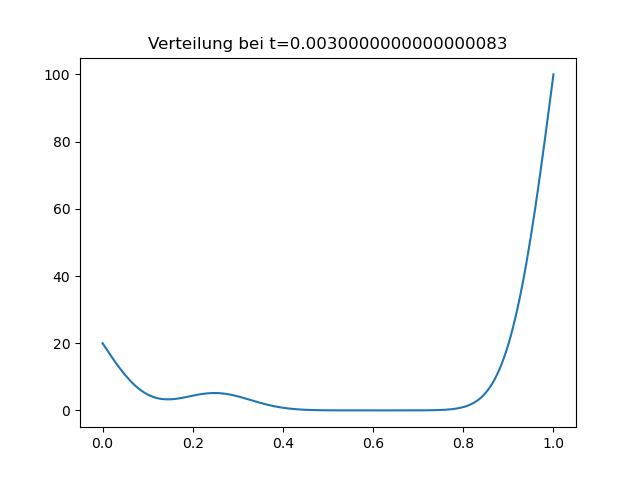

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

L = 1
D = 1
M = 1

T_l = 20 # linke Randbedingung
T_r = 100 # rechte Randbedingung

N = 200 # Anzahl der räumlichen Intervale
dx = L/N
alpha = 0.3
dt = alpha * dx**2 / D

# Anfangsverteilung
u_0 = np.zeros(N+1)
u_0[int(N/4)] = M/dx
u_0[0] = T_l
u_0[-1] = T_r

t_end = 0.003
t = 0.0
u = u_0.copy()

while t < t_end:
    u[1:N] = (1 - 2*alpha)*u[1:N] + alpha*(u[0:N-1] + u[2:])
    t += dt

plt.figure(1)
plt.clf()
plt.plot(u_0)
plt.title("Anfangsverteilung")
plt.show();

plt.figure(2)
plt.clf()
xs = np.linspace(0, L, N+1)
plt.plot(xs, u)
plt.title(f"Verteilung bei {t=}")
#plt.plot(xs, u/np.max(u))
#plt.plot(xs, np.sin(np.pi * xs/L))
plt.show();

In [7]:
def solve(t_end):
    """Simuliere Zeitentwicklung von 0 bis t_end."""   
    t = 0.0
    u = u_0.copy()

    while t < t_end:
        u[1:N] = (1 - 2*alpha)*u[1:N] + alpha*(u[0:N-1] + u[2:])
        t += dt
    return u

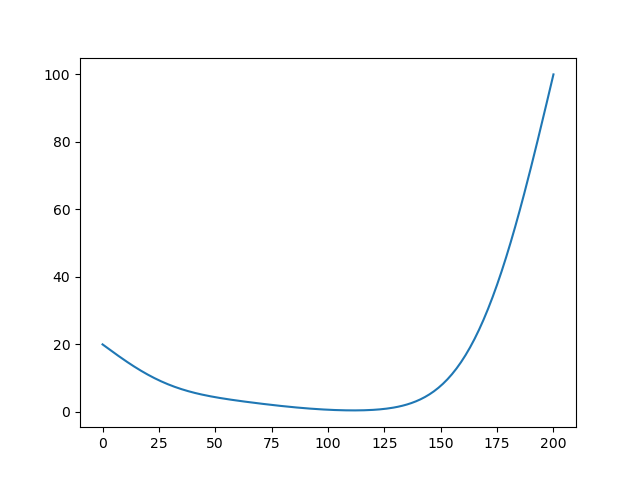

In [8]:
u_1 = solve(.01)
plt.figure(3)
plt.cla()
plt.plot(u_1)
plt.show()

In [9]:
import time
t1 = time.perf_counter()
u1 = solve(0.1)
t2 = time.perf_counter()
print(f"Laufzeit = {t2-t1} Sekunden")

Laufzeit = 0.06696204199943168 Sekunden


In [10]:
%%time
u2 = solve(0.1)
u2 = solve(0.1)

CPU times: user 86.4 ms, sys: 2.56 ms, total: 88.9 ms
Wall time: 90.7 ms


In [11]:
%%timeit
u1 = solve(0.1)

31.6 ms ± 50.6 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
def solve_loop(t_end):
    """Simuliere Zeitentwicklung von 0 bis t_end."""   
    t = 0.0
    u = u_0.copy()

    while t < t_end:
        for k in range(1, N):
            u[k] = (1 - 2*alpha)*u[k] + alpha*(u[k-1] + u[k+1])
        t += dt
    return u

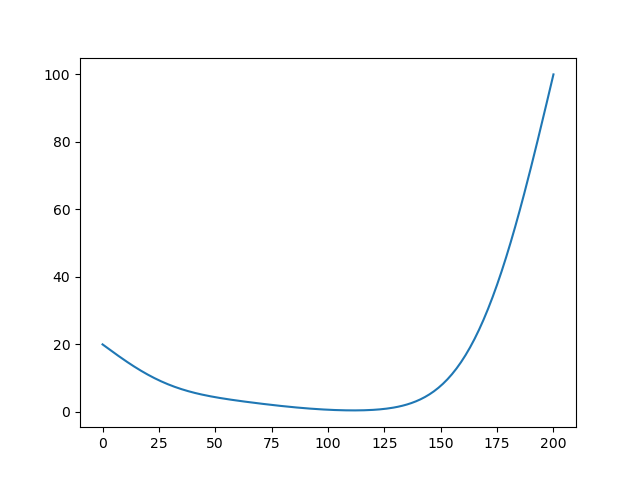

In [13]:
u_loop = solve_loop(.01)
plt.figure(3)
plt.cla()
plt.plot(u_1)
plt.show()

In [15]:
%%time
u_loop = solve_loop(0.1)

CPU times: user 913 ms, sys: 4.19 ms, total: 917 ms
Wall time: 918 ms


In [16]:
import numba

In [39]:
@numba.njit
def solve_loop_numba(t_end):
    """Simuliere Zeitentwicklung von 0 bis t_end."""   
    t = 0.0
    u = u_0.copy()
    
    while t < t_end:
        for k in range(1, N):
            u[k] = (1 - 2*alpha)*u[k] + alpha*(u[k-1] + u[k+1])
        t += dt
    return u

In [32]:
u_loop = solve_loop_numba(0.1)

In [38]:
%%time
u_loop = solve_loop_numba(0.1)

CPU times: user 78.8 ms, sys: 3.94 ms, total: 82.7 ms
Wall time: 83.1 ms


In [47]:
%%time
u_loop = solve_loop_numba(1.)

CPU times: user 137 ms, sys: 4.04 ms, total: 141 ms
Wall time: 139 ms
